## R Prep Minicourse
### Week 12: Plotting 

**Credits:** [Datacamp's Data Visualization in R](https://campus.datacamp.com/courses/data-visualization-in-r)

#### Scatter plots

In this exercise, you'll construct a simple exploratory plot from a data frame that gives values for three variables, recorded over two winter heating seasons. The variables are:

- `Temp`: a measure of the outside temperature during one week
- `Gas`: the amount of heating gas consumed during that week
- `Insul`: a categorical variable with two values, indicating whether the measurements were made before or after an insulation upgrade was made to the house

In [1]:
library(MASS)

data(whiteside)

?whiteside

options(repr.plot.width = 4, repr.plot.height = 4)

whiteside {MASS},R Documentation


In [2]:
str(whiteside)

'data.frame':	56 obs. of  3 variables:
 $ Insul: Factor w/ 2 levels "Before","After": 1 1 1 1 1 1 1 1 1 1 ...
 $ Temp : num  -0.8 -0.7 0.4 2.5 2.9 3.2 3.6 3.9 4.2 4.3 ...
 $ Gas  : num  7.2 6.9 6.4 6 5.8 5.8 5.6 4.7 5.8 5.2 ...


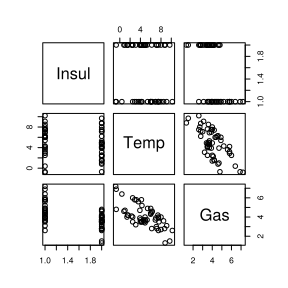

In [3]:
# Plot whiteside data
plot(whiteside)

Use the `plot()` function to construct a scatterplot of the heating gas consumption, `Gas`, versus the outside temperature, `Temp`, from the whiteside data frame. Label the x- and y-axes to indicate the variables in the plot (i.e. "Outside temperature" and "Heating gas consumption", respectively.)

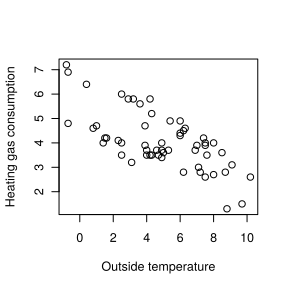

In [4]:
# Plot Gas vs. Temp
plot(whiteside$Temp, whiteside$Gas, xlab = "Outside temperature", ylab = "Heating gas consumption")

One of the key features of the `plot()` function is that it is generic, meaning that the results of applying the function depend on the nature of the object to which it is applied.

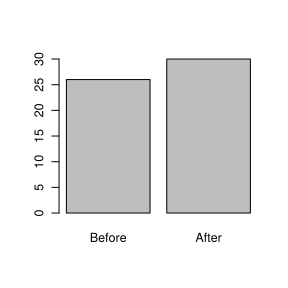

In [5]:
# Apply the plot() function to Insul
plot(whiteside$Insul)

Adding additional details to your explanatory plots can help emphasize certain aspects of your data. For example, by specifying the `pch` and `col` arguments to the `plot()` function, you can add different point shapes and colors to show how different variables or subsets of your data relate to each other. In addition, you can add a new set of points to your existing scatterplot with the `points()` function, and add reference lines with the `abline()` function.

'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

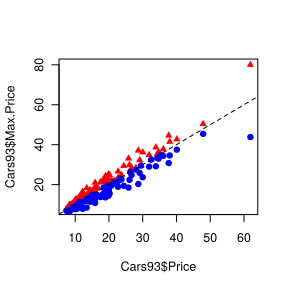

In [6]:
data(Cars93)
str(Cars93)

# Plot Max.Price vs. Price as red triangles
plot(Cars93$Price, Cars93$Max.Price, col = "red", pch = 17)

# Add Min.Price vs. Price as blue circles
points(Cars93$Price, Cars93$Min.Price, col = "blue", pch = 16)

# Add an equality reference line with abline()
abline(a = 0, b = 1, lty = 2)

In [0]:
# Question 1: How can we figure out what "pch" means in the plot function call above?

# Question 2: How can we figure out what "a" and "b" mean in the abline function call above?

You can plot multiple graphs on a single pane using the `par()` function with its `mfrow` parameter. For example, `par(mfrow = c(1, 2))` creates a plot array with 1 row and 2 columns, allowing you to view two graphs side-by-side. This way, you can compare and contrast different datasets or different views of the same dataset. This exercise asks you to compare two views of the `Animals2` dataset from the `robustbase` package, differing in how its variables are represented.

'data.frame':	65 obs. of  2 variables:
 $ body : num  1.35 465 36.33 27.66 1.04 ...
 $ brain: num  8.1 423 119.5 115 5.5 ...


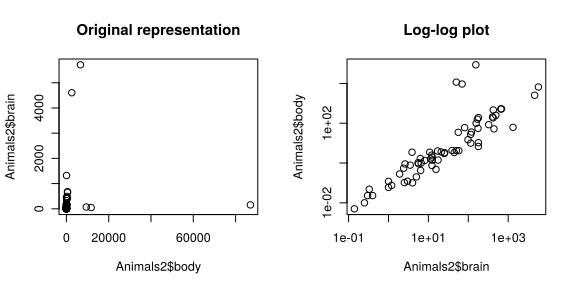

In [7]:
library(robustbase)
str(Animals2)

# Set up the side-by-side plot array
par(mfrow = c(1, 2))
options(repr.plot.width = 8, repr.plot.height = 4)

# First plot: brain vs. body in its original form
plot(Animals2$body, Animals2$brain)

# Add the first title
title("Original representation")

# Second plot: log-log plot of brain vs. body
plot(Animals2$brain, Animals2$body, log = "xy")

# Add the second title
title("Log-log plot")


#### Histograms

Histograms are probably the best-known way of looking at how the values of a numerical variable are distributed over their range, and R provides several different histogram implementations.

The purpose of this exercise is to introduce two of these:

- `hist()` is part of base R and its default option yields a histogram based on the number of times a record falls into each of the bins on which the histogram is based.

- `truehist()` is from the MASS package and scales these counts to give an estimate of the probability density.

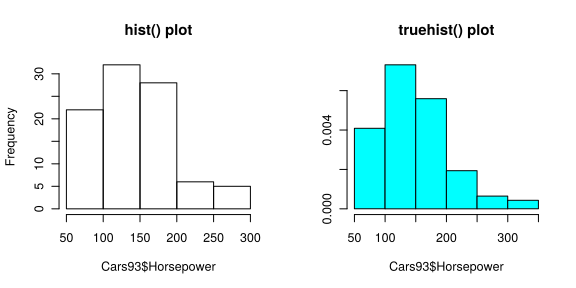

In [8]:
# Set up a side-by-side plot array
par(mfrow = c(1, 2))

# Create a histogram of counts with hist()
hist(Cars93$Horsepower, main="hist() plot")

# Create a normalized histogram with truehist()
truehist(Cars93$Horsepower, main="truehist() plot")

While they are probably not as well known as the histogram, density estimates may be regarded as smoothed histograms, designed to give a better estimate of the density function for a random variable.

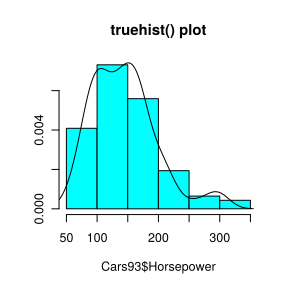

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)

# Create a normalized histogram with truehist()
truehist(Cars93$Horsepower, main="truehist() plot")

# Add the density curve to the histogram
lines(density(Cars93$Horsepower))

#### Adding lines, points, and legends

The point of this exercise is to show how the `lines()` function can be used to add lines to an existing plot. Note that line types are set by the `lty` argument, with the default value `lty = 1` specifying solid lines, `lty = 2` specifying dashed lines, and `lty = 3` specifying dotted lines. Also note that the `lwd` argument specifies the relative width.


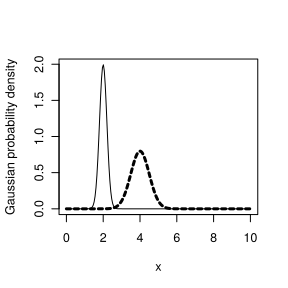

In [10]:
# Create the numerical vector x
x <- seq(0, 10, length = 200)

# Compute the Gaussian density for x with mean 2 and standard deviation 0.2
gauss1 <- dnorm(x, mean = 2, sd = 0.2)

# Compute the Gaussian density with mean 4 and standard deviation 0.5
gauss2 <- dnorm(x, mean = 4, sd = 0.5)

# Plot the first Gaussian density
plot(x, gauss1, type = "l", ylab = "Gaussian probability density")

# Add lines for the second Gaussian density
lines(x, gauss2, lty = 2, lwd = 3)

Similarly, you can add points to a plot with the `points()` function.

In a call to functions like plot() or points(), we can make the `pch` argument depend on a variable in our dataset. This provides a simple way of indicating different data subsets with different point shapes or symbols.

This exercise asks you to generate two plots of mpg vs. hp from the mtcars data frame in the datasets package. The first plot specifies the point shapes using numerical values of the pch argument defined by the cyl variable in the mtcars data frame. The second plot illustrates the fact that pch can also be specified as a vector of single characters, causing each point to be drawn as the corresponding character.

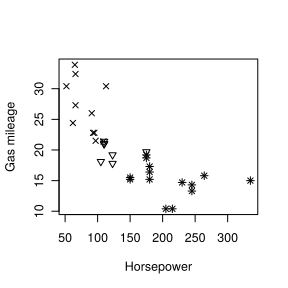

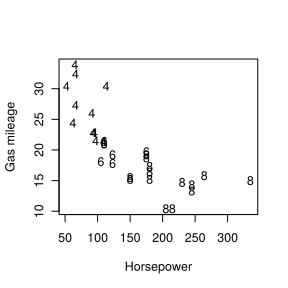

In [11]:
# Create an empty plot using type = "n"
plot(mtcars$hp, mtcars$mpg, type = "n",
     xlab = "Horsepower", ylab = "Gas mileage")

# Add points with shapes determined by cylinder number
points(mtcars$hp, mtcars$mpg, pch = mtcars$cyl)

# Create a second empty plot
plot(mtcars$hp, mtcars$mpg, type = "n",
     xlab = "Horsepower", ylab = "Gas mileage")

# Add points with shapes as cylinder characters
points(mtcars$hp, mtcars$mpg, 
       pch = as.character(mtcars$cyl))

We can use of the `legend()` function to add explanatory text to a plot.

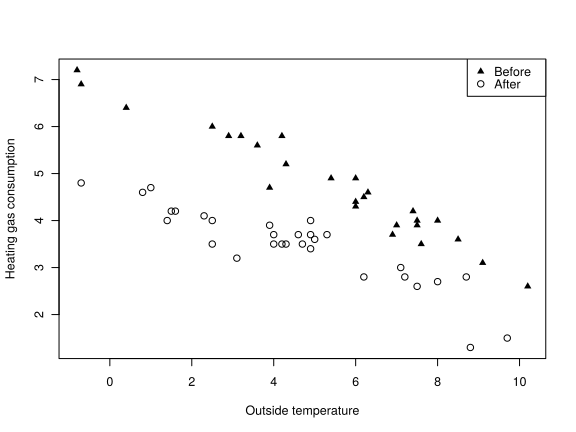

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6)
#Set up and label empty plot of Gas vs. Temp
plot(whiteside$Temp, whiteside$Gas,
     type = "n", xlab = "Outside temperature",
     ylab = "Heating gas consumption")

# Create indexB, pointing to "Before" data
indexB <- which(whiteside$Insul == "Before")

# Create indexA, pointing to "After" data
indexA <- which(whiteside$Insul == "After")

# Add "Before" data as solid triangles
points(whiteside$Temp[indexB], whiteside$Gas[indexB],
       pch = 17)

# Add "After" data as open circles
points(whiteside$Temp[indexA], whiteside$Gas[indexA],
       pch = 1)

# Add legend that identifies points as "Before" and "After"
legend("topright", pch = c(17, 1), 
       legend = c("Before", "After"))